## TS4

Se pide diseñar un filtro pasabanda que cumpla con la siguiente plantilla:

* $\omega_0 = 2\pi 22 KHz$
* $Q = 5$
* Aproximación Chebyshev con ripple de $0,5 dB$

También se sabe que la transferencia del filtro debe ser:

* $T(f_{s1}) = -16 dB$ para $f_{s1} = 17 KHz$
* $T(f_{s2}) = -24 dB$ para $f_{s2} = 36 KHz$

![Plantilla](img/plantilla_original.JPG)

Consignas de la actividad:

* Obtener la plantilla de diseño pasabanda normalizada.
* Obtener la función transferencia normalizada del prototipo pasabajo que satisfaga el requerimiento del filtro pasabanda.
* Obtener la transferencia pasabanda normalizada.
* Implementar mediante secciones pasivas separadas por seguidores de tensión activos.
* Activar las redes pasivas mediante la red propuesta aquí debajo y comprobar mediante simulación el comportamiento deseado.

![Red_Propuesta](img/red_activa.JPG)

### Resolución

Para poder tener la plantilla completa, debo hallar los valores de $f_{p1}$ y $f_{p2}$.

$f_{p2} - f_{p1} = \frac{f_0}{Q}$

$f_{p2} - f_{p1} = \frac{22000}{5}$

$f_{p2} - f_{p1} = 4400$

$f_{p2} = f_{p1} + 4400$

$f_0^2 = f_{p1} . f_{p2}$

$f_0^2 = f_{p1} . (f_{p1} + 4400)$

$f_0^2 = f_{p1}^2 + f_{p1} . 4400$

$0 = f_{p1}^2 + f_{p1} . 4400 - f_0^2$

Al resolver esta expresión cuadrática, obtenemos 2 resultados:

$f_{p1} = 19909,72$

$f_{p1} = -24309,72$

Nos quedamos con el resultado positivo y luego reemplazamos para hallar $f_{p2}$

$f_{p2} = f_{p1} + 4400 = 24309,72$

Finalmente:

* $f_{p1} = 19909,72$ 
* $f_{p2} = 24309,72$

La plantilla de diseño del pasabanda queda:

<div><img src="img/plantilla_BP_completa.jpeg" width="500"/></div>

Tomo como norma de frecuencia $\Omega_\omega = \omega_0 = 2\pi f_0$

* $\omega_{s1} = \frac{2\pi f_{s1}}{2\pi f_0} = \frac{f_{s1}}{f_0} = 0,7727$
* $\omega_{p1} = \frac{2\pi f_{p1}}{2\pi f_0} = \frac{f_{p1}}{f_0} = 0,9049$
* $\omega_0 = \frac{2\pi f_0}{2\pi f_0} = 1 $
* $\omega_{p2} = \frac{2\pi f_{p2}}{2\pi f_0} = \frac{f_{p2}}{f_0} = 1,1049$
* $\omega_{s2} = \frac{2\pi f_{s2}}{2\pi f_0} = \frac{f_{s2}}{f_0} = 1,6363$

<div><img src="img/plantilla_BP_completa_normalizada.jpeg" width="500"/></div>


Utilizando la función de transformación pasa-banda a pasa-bajos, se obtienen los siguientes valores de frecuencia.

$\Omega = Q . \frac{\omega-\omega_o}{\omega}$

* $\Omega_{s1} = -2,6073$
* $\Omega_{p1} = -1,0009$
* $\Omega_0 = 0$
* $\Omega_{p2} = 0,9992$
* $\Omega_{s2} = 5,1258$

Esto supone 2 casos posibles para las plantillas pasa-bajos prototipos:

* Una plantilla con $\Omega_p = 1$, $\Omega_s = 2,61$ y $\alpha_{min} = 16dB$
* Una plantilla con $\Omega_p = 1$, $\Omega_s = 5,13$ y $\alpha_{min} = 24dB$

Para ambas plantillas $\alpha_{max} = 0,5dB$

Se debe analizar cuál de las 2 plantillas es más exigente (requiere un n mayor). De esta manera, al elegir el caso más exigente, se puede asegurar que se cumpliran los requisitos con respecto a ambas bandas de paso.

$\epsilon^2$ será el mismo para ambos casos y se calcula como:

$\epsilon^2 = 10^{\frac{\alpha_{max}}{10}}-1$

In [7]:
alpha_max = 0.5
ee = 10**(alpha_max/10) - 1
print(f'ee = {ee}')

ee = 0.12201845430196334


$\epsilon^2 = 0,122$

Para calcular el orden, se debe utilizar la función de aproximación de Chebyshev:

$|T(j\Omega)|^2=\frac{1}{1 + \epsilon^2 . C_n^2(\Omega)}$

$\alpha_{dB} = 10 . log(1 + \epsilon^2 . C_n^2(\Omega))$

$C_n(\Omega) = cosh(n . cosh^{-1}(\Omega))$

In [13]:
# Iteramos para el caso Omega_stop = 2.61 alpha_min = 16dB

Ws = 2.61
for n in range(1,5):
    Cn = np.cosh(n * np.arccosh(Ws))
    alpha = 10 * np.log10(1 + ee*(Cn**2))
    print(f'para n = {n}: alpha = {alpha}')

para n = 1: alpha = 2.6270641778663686
para n = 2: alpha = 13.105487059697724
para n = 3: alpha = 26.898948574906406
para n = 4: alpha = 40.90541198432991


Para esta plantilla, se puede observar que con $n = 3$ se cumple el requisito de $\alpha_{min}$

In [19]:
# Iteramos para el caso Omega_stop = 5.13 alpha_min = 24dB

Ws = 5.13
for n in range(1,5):
    Cn = np.cosh(n * np.arccosh(Ws))
    alpha = 10 * np.log10(1 + ee*(Cn**2))
    print(f'para n = {n}: alpha = {alpha}')

para n = 1: alpha = 6.243503603249784
para n = 2: alpha = 25.135611894132488
para n = 3: alpha = 45.260836223596726
para n = 4: alpha = 65.3999338669196


Para esta plantilla, se puede observar que con $n = 2$ se cumple el requisito de $\alpha_{min}$

Con el criterio de elegir la plantilla más exigente (mayor orden), se debe elegir la siguiente plantilla para diseñar el filtro pasa-bajos prototipo.

<div><img src="img/plantilla_LP_completa_normalizada.jpeg" width="500"/></div>

El polinomio de Chebyshev también se puede expresar en su forma recursiva:

$C_n(\Omega) = 2.\Omega.C_{n-1} - C_{n-2}$

Con $C_0 = 1$ y $C_1 = \Omega$

Para $n = 3$:

$C_0 = 1$

$C_1 = \Omega$

$C_2 = 2.\Omega.\Omega - 1 = 2.\Omega^2-1$

$C_3 = 2.\Omega.(2.\Omega^2 - 1) - \Omega = 4\Omega^3 - 3 \Omega$

El módulo de la transferencia al cuadrado queda:

$|T(j\Omega)|^2 = \frac{1}{1 + \epsilon^2 . C_3^2}$

$|T(j\Omega)|^2 = \frac{1}{1 + \epsilon^2 . (4\Omega^3 - 3 \Omega)^2}$

$|T(j\Omega)|^2 = \frac{1}{1 + \epsilon^2 . (16\Omega^6-24\Omega^4+9\Omega^2)}$

Considerando que $\Omega = \frac{S}{j}$ y teniendo en cuenta que:

* $j^6 = -1$
* $j^4 = 1$
* $j^2 = -1$

La expresión queda:

$|T(j\Omega)|^2 = \frac{1}{1 + \epsilon^2 . (-16S^6-24S^4-9S^2)}$

$|T(j\Omega)|^2 = \frac{1}{-\epsilon^2 16 S^6 -\epsilon^2 24 S^4-\epsilon^2 9 S^2 + 1}$

Usando python, se calculan las raíces del denominador para hallar los polos.

In [25]:
import numpy as np

den = [(-ee*16), 0, (-ee*24), 0, (-ee*9), 0, 1]
polos = np.roots(den)

# Nos quedamos con los polos cuya parte real es negativa para armar el sistema
for polo in polos:
    if polo.real < 0:
        print(polo)

(-0.31324228480518584+1.0219404028464278j)
(-0.31324228480518584-1.0219404028464278j)
(-0.6264845696103722+0j)


Utilizando estos polos, se puede expresar la transferencia como un sistema de primer orden y uno de segundo orden, cuyo denominador esté conformado por el polinomio resultante del producto entre los polos complejos conjugados.

Transferencia del pasa-bajos prototipo normalizada:

$T(S) = \sqrt{\epsilon^2 . 16} . \frac{1}{S + 0,6264} . \frac{1}{S^2 + S . 0,6264 + 1,1424}$

Para pasar a la expresión del pasa-banda, se utiliza la función de transformación:

$S = Q . \frac{s^2+1}{s}$

$T(s) = \sqrt{\epsilon^2 . 16} . \frac{1}{(Q . \frac{s^2+1}{s}) + 0,6264} . \frac{1}{(Q . \frac{s^2+1}{s})^2 + (Q . \frac{s^2+1}{s}) . 0,6264 + 1,1424}$

$T(s) = \sqrt{\epsilon^2 . 16} . \frac{\frac{1}{Q} . s}{s^2 + s . \frac{0,6264}{Q} + 1} . \frac{\frac{1}{Q^2} . s^2}{s^4 + s^3 . \frac{0,6264}{Q} + s^2 . (2+\frac{1,1424}{Q^2}) + s . \frac{0,6264}{Q} + 1}$

$T(s) = (\sqrt{\epsilon^2 . 16} . \frac{1}{Q} . \frac{1}{Q^2}) . \frac{s}{s^2 + s . 0,1253 + 1} . \frac{s^2}{s^4 + s^3 . 0,1253 + s^2 . 2,0457 + s . 0,1253 + 1}$

Si se calculan las raices del polinomio de orden 4 del denominador, luego se pueden agrupar como 2 pares de polos complejos conjugados que conforman 2 polinomios de orden 2.

In [35]:
den = [1, 0.1253, 2.0457, 0.1253, 1]
polos = np.roots(den)

for polo in polos:
    print(polo)

(-0.03451119183153373+1.1069197963899677j)
(-0.03451119183153373-1.1069197963899677j)
(-0.028138808168466454+0.9025305170722862j)
(-0.028138808168466454-0.9025305170722862j)


La transferecia del pasa-banda normalizada queda de la siguiente manera:

$T(s) = (\sqrt{\epsilon^2 . 16} . \frac{1}{Q} . \frac{1}{Q^2}) . \frac{s}{s^2 + s . 0,1253 + 1} . \frac{s}{s^2 + s . 0,069 + 1,2264} . \frac{s}{s^2 + s . 0,0562 + 0,8153}$

Se puede expresar la transferencia del pasa banda de segundo orden con la siguiente expresión:

$T_{BP}(s) = \frac{\frac{\omega_0}{Q} . s}{s^2 + s . \frac{\omega_0}{Q} + \omega_0^2}$

Utilizando la siguiente red de componentes pasivos, se llega a la expresión:

![Red_RLC_BP_pasiva](img/red_pasiva_rlc.JPG)

$T(s) = \frac{\frac{1}{R . C} . s}{s^2 + s . \frac{1}{R . C} + \frac{1}{L . C}}$

Quedan determinadas las siguientes relaciones:

$\omega_0^2 = \frac{1}{L . C}$

$\frac{\omega_0}{Q} = \frac{1}{R . C}$

Asumiendo que $C_1 = C_2 = C_3 = 1$ y analizando cada una de las etapas:

Etapa 1:

${\omega_0}_1^2 = 1$

${\omega_0}_1 = 1$

$\frac{{\omega_0}_1}{Q_1} = 0,1253$

$Q_1 = \frac{1}{0,1253} = 7,98$

$K_1 . \frac{{\omega_0}_1}{Q_1} = 1$

$K_1 = \frac{1}{0,1253} = 7,98$

$\frac{7,98 . (0,1253) . s}{s^2+ s . 0,1253 + 1}$

Para los componentes:

${\omega_0}_1^2 = 1 = \frac{1}{L_1 . C_1}$

$C_1 = 1$ por ende $L_1 = 1$

$\frac{{\omega_0}_1}{Q_1} = 0,1253 = \frac{1}{R_1 . C_1}$

$C_1 = 1$ por ende $R_1 = \frac{1}{0,1253} = 7,98$

Etapa 2:

${\omega_0}_2^2 = 1,2264$

${\omega_0}_2 = 1,1074$

$\frac{{\omega_0}_2}{Q_2} = 0,069$

$Q_2 = \frac{1,1074}{0,069} = 16,05$

$K_2 . \frac{{\omega_0}_2}{Q_2} = 1$

$K_2 = \frac{1}{0,069} = 14,5$

$\frac{14,5 . (0,069) . s}{s^2+ s . 0,069 + (1,1074)^2}$

Para los componentes:

${\omega_0}_2^2 = 1,2264 = \frac{1}{L_2 . C_2}$

$C_2 = 1$ por ende $L_2 = \frac{1}{1,2264} = 0,8154$

$\frac{{\omega_0}_2}{Q_2} = 0,069 = \frac{1}{R_2 . C_2}$

$C_2 = 1$ por ende $R_2 = \frac{1}{0,069} = 14,5$

Etapa 3:

${\omega_0}_3^2 = 0,8153$

${\omega_0}_3 = 0,9029$

$\frac{{\omega_0}_3}{Q_3} = 0,0562$

$Q_3 = \frac{0,9029}{0,0562} = 16,05$

$K_3 . \frac{{\omega_0}_3}{Q_3} = 1$

$K_3 = \frac{1}{0,0562} = 17,8$

$\frac{17,8 . (0,0562) . s}{s^2+ s . 0,0562 + (0,9029)^2}$

Para los componentes:

${\omega_0}_3^2 = 0,8153 = \frac{1}{L_3 . C_3}$

$C_3 = 1$ por ende $L_3 = \frac{1}{0,8153} = 1,2265$

$\frac{{\omega_0}_3}{Q_3} = 0,0562 = \frac{1}{R_3 . C_3}$

$C_3 = 1$ por ende $R_3 = \frac{1}{0,0562} = 17,8$


Arreglando la expresión de la transferencia queda:

$T(s) = (\sqrt{\epsilon^2 . 16} . \frac{1}{Q} . \frac{1}{Q^2}) . \frac{7,98 . (0,1253) . s}{s^2+ s . 0,1253 + 1} . \frac{14,5 . (0,069) . s}{s^2+ s . 0,069 + (1,1074)^2} . \frac{17,8 . (0,0562) . s}{s^2+ s . 0,0562 + (0,9029)^2}$

Agrupando todas las ganancias en una sola variable $K$ queda:

$T(s) = (\sqrt{\epsilon^2 . 16} . \frac{1}{Q} . \frac{1}{Q^2} . 7,98 . 14,5 . 17,8) . \frac{(0,1253) . s}{s^2+ s . 0,1253 + 1} . \frac{(0,069) . s}{s^2+ s . 0,069 + (1,1074)^2} . \frac{(0,0562) . s}{s^2+ s . 0,0562 + (0,9029)^2}$

$T(s) = K . \frac{(0,1253) . s}{s^2+ s . 0,1253 + 1} . \frac{(0,069) . s}{s^2+ s . 0,069 + (1,1074)^2} . \frac{(0,0562) . s}{s^2+ s . 0,0562 + (0,9029)^2}$

In [40]:
Q = 5
K1 = 7.98
K2 = 14.5
K3 = 17.8

K = np.sqrt(ee*16) * (1/Q) * (1/Q**2) * K1 * K2 * K3

print(f'K = {K}')

K = 23.02082002350796


$T(s) = 23,02 . \frac{(0,1253) . s}{s^2+ s . 0,1253 + 1} . \frac{(0,069) . s}{s^2+ s . 0,069 + (1,1074)^2} . \frac{(0,0562) . s}{s^2+ s . 0,0562 + (0,9029)^2}$

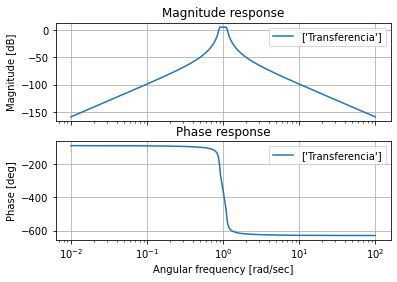

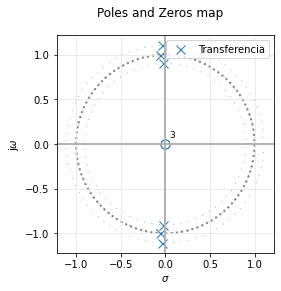

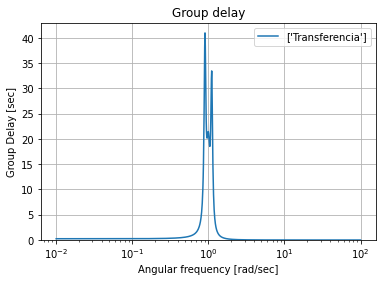

In [42]:
import matplotlib.pyplot as plt
import scipy.signal as sig
import numpy as np
from splane import analyze_sys

num = [0.0111, 0, 0, 0]
den = [1, 0.2504, 3.0612, 0.5065, 3.0612, 0.2504, 1]

transfer_f = sig.TransferFunction(num, den)

plt.close('all')
analyze_sys(transfer_f, 'Transferencia')


### Simulación circuital desnormalizada

Nuestra norma de frecuencia era: $\Omega_\omega = 2\pi . f_0 = 2\pi . 22KHz$

Elegimos una norma de impedancia arbitraria: $\Omega_Z = 1K\Omega$

In [44]:
f0 = 22000
Ww = 2*np.pi*f0
Wz = 1000

C1_n = 1
C2_n = 1
C3_n = 1
L1_n = 1
L2_n = 0.8154
L3_n = 1.2265
R1_n = 7.98
R2_n = 14.5
R3_n = 17.8

C1_dn = C1_n / (Ww * Wz)
C2_dn = C2_n / (Ww * Wz)
C3_dn = C3_n / (Ww * Wz)
L1_dn = (L1_n * Wz) / Ww
L2_dn = (L2_n * Wz) / Ww
L3_dn = (L3_n * Wz) / Ww
R1_dn = R1_n * Wz
R2_dn = R2_n * Wz
R3_dn = R3_n * Wz

print(f'C1: {C1_dn}')
print(f'C2: {C2_dn}')
print(f'C3: {C3_dn}')
print(f'L1: {L1_dn}')
print(f'L2: {L2_dn}')
print(f'L3: {L3_dn}')
print(f'R1: {R1_dn}')
print(f'R2: {R2_dn}')
print(f'R3: {R3_dn}')


C1: 7.2343155950861536e-09
C2: 7.2343155950861536e-09
C3: 7.2343155950861536e-09
L1: 0.007234315595086153
L2: 0.005898860936233249
L3: 0.008872888077373166
R1: 7980.0
R2: 14500.0
R3: 17800.0


Se puede observar en el circuito que se añadió un amplificador operacional en configuración NO INVERSOR que aporta el valor de la ganancia K que se detalla en la ecuación de la transferencia.

![Circuito_desnormalizado](img/circuito_desnormalizado.JPG)

![Transferencia_desnormalizada](img/transferencia_desnormalizada.JPG)

![Transferencia_desnormalizada_cursores](img/transferencia_desnormalizada_cursores.JPG)

### Simulación circuital desnormalizada activada

![Circuito_desnormalizado_activado](img/circuito_desnormalizado_activado.JPG)

![Transferencia_desnormalizada_activada](img/transferencia_desnormalizada_activada.JPG)

![Transferencia_desnormalizada_activada_cursores](img/transferencia_desnormalizada_activada_cursores.JPG)